In [40]:
from pandas import DataFrame, read_csv

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [44]:
matchFilePath = r'C:\Users\kumar\OneDrive\Documents\Projects\SoccerSPI\data\external\spi_matches.csv'
matchDF = pd.read_csv(matchFilePath)
matchDF.head(10)


,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Burnley,Swansea City,58.98,59.74,0.4482,0.2663,0.2854,...,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,0.2927,...,33.9,32.5,1.0,1.0,1.40,0.55,1.13,1.06,1.05,1.05
5,2016-08-13,2411,Barclays Premier League,Southampton,Watford,69.49,59.33,0.5759,0.1874,0.2367,...,34.1,30.7,1.0,1.0,1.05,0.22,1.52,0.41,1.05,1.05
6,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
7,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
8,2016-08-13,1843,French Ligue 1,Bordeaux,St Etienne,62.01,64.92,0.4232,0.2764,0.3004,...,37.9,44.2,3.0,2.0,1.03,1.84,1.10,2.26,3.12,2.10
9,2016-08-13,2411,Barclays Premier League,Manchester City,Sunderland,86.42,53.64,0.8152,0.0525,0.1323,...,73.0,27.0,2.0,1.0,2.14,1.25,1.81,0.92,2.10,1.05


In [45]:
regDF = matchDF.drop(columns=['date','league_id','league','team1','team2'])
regDF.describe()

,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,20879.000000,20879.000000,20879.000000,20879.000000,20879.000000,20879.000000,20879.000000,10514.000000,10514.000000,14304.000000,14304.000000,8656.000000,8656.000000,8656.000000,8656.000000,8656.000000,8656.000000
mean,46.565660,46.532621,0.452648,0.291808,0.255543,1.521826,1.143869,30.795311,30.125480,1.537332,1.167086,1.474079,1.120992,1.404032,1.119247,1.551795,1.167246
std,18.620568,18.612862,0.157729,0.141513,0.046817,0.425894,0.417524,25.358560,25.026422,1.282892,1.143750,0.831428,0.717036,0.653623,0.570383,1.256153,1.124703
min,5.230000,4.970000,0.028100,0.000000,0.000000,0.250000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.040000,33.040000,0.353800,0.200100,0.236700,1.240000,0.880000,10.900000,10.500000,1.000000,0.000000,0.850000,0.580000,0.950000,0.720000,1.050000,0.000000
50%,44.250000,44.190000,0.444900,0.275600,0.263500,1.460000,1.090000,26.300000,25.400000,1.000000,1.000000,1.340000,0.990000,1.310000,1.030000,1.050000,1.050000
75%,59.480000,59.405000,0.540050,0.363900,0.284600,1.720000,1.360000,44.600000,43.600000,2.000000,2.000000,1.940000,1.500000,1.740000,1.420000,2.100000,2.100000
max,96.570000,96.780000,0.977500,0.881900,0.453700,4.030000,3.420000,100.000000,100.000000,8.000000,8.000000,7.040000,6.200000,6.580000,5.920000,7.970000,6.760000


In [46]:
regDF.dropna(subset=['score1','score2'],inplace=True)

In [49]:
regDF.fillna(regDF.mean(),inplace=True)
regDF.isna().sum()

spi1           0
spi2           0
prob1          0
prob2          0
probtie        0
proj_score1    0
proj_score2    0
importance1    0
importance2    0
score1         0
score2         0
xg1            0
xg2            0
nsxg1          0
nsxg2          0
adj_score1     0
adj_score2     0
dtype: int64

,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,32.4,67.7,0.0,1.0,0.970000,0.630000,0.430000,0.450000,0.000000,1.050000
1,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,53.7,22.9,2.0,2.0,2.450000,0.770000,1.750000,0.420000,2.100000,2.100000
2,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0,0.850000,2.770000,0.170000,1.250000,2.100000,1.050000
3,58.98,59.74,0.4482,0.2663,0.2854,1.37,1.05,36.5,29.1,0.0,1.0,1.240000,1.840000,1.710000,1.560000,0.000000,1.050000
4,56.32,60.35,0.4380,0.2692,0.2927,1.30,1.01,33.9,32.5,1.0,1.0,1.400000,0.550000,1.130000,1.060000,1.050000,1.050000
5,69.49,59.33,0.5759,0.1874,0.2367,1.91,1.05,34.1,30.7,1.0,1.0,1.050000,0.220000,1.520000,0.410000,1.050000,1.050000
6,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0,0.730000,1.110000,0.880000,1.810000,1.050000,1.050000
7,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0,1.110000,0.680000,0.840000,1.600000,0.000000,1.050000
8,62.01,64.92,0.4232,0.2764,0.3004,1.39,1.14,37.9,44.2,3.0,2.0,1.030000,1.840000,1.100000,2.260000,3.120000,2.100000
9,86.42,53.64,0.8152,0.0525,0.1323,2.69,0.48,73.0,27.0,2.0,1.0,2.140000,1.250000,1.810000,0.920000,2.100000,1.050000


In [50]:
noScoreDF = regDF.drop(columns=['score1','score2'])

In [51]:
# Split Total Data into Train and Test
from sklearn.model_selection import train_test_split

team1X_train, team1X_test, team1Y_train, team1Y_test = train_test_split(noScoreDF, regDF.score1, random_state=1)

In [52]:
from sklearn.linear_model import LinearRegression

team1Reg = LinearRegression()
team1Reg.fit(team1X_train,team1Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
team1Predict_train = team1Reg.predict(team1X_train)
team1Predict_test = team1Reg.predict(team1X_test)



In [54]:


print(np.mean(np.subtract(team1Y_train.values,team1Predict_train) ** 2))
print (np.mean(np.subtract(team1Y_test.values,team1Predict_test) ** 2))

0.6285112065269256
0.6165490142881478


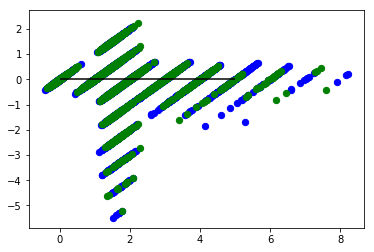

In [58]:
plt.scatter(team1Predict_train,np.subtract(team1Predict_train,team1Y_train.values),c='b',s=40)
plt.scatter(team1Predict_test,np.subtract(team1Predict_test,team1Y_test.values),c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=5)

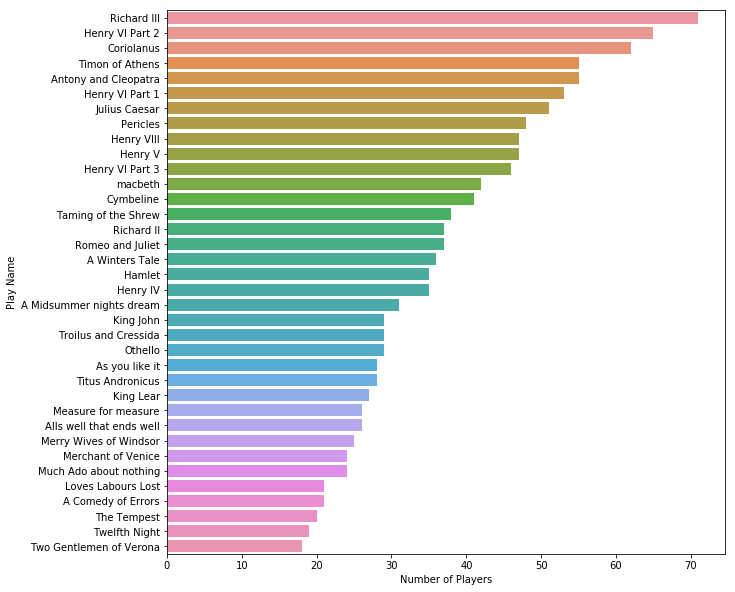

In [62]:
# Shows number of Players in Each Plays
import numpy as np

numberPlayers = spDF.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()
numberPlayers['Play'] = numberPlayers.index.tolist()
numberPlayers.columns = ['Num Players','Play']
numberPlayers.index= np.arange(0,len(numberPlayers))
numberPlayers

plt.figure(figsize=(10,10))
ax = sns.barplot(x='Num Players',y='Play',data=numberPlayers)
ax.set(xlabel='Number of Players', ylabel='Play Name')
plt.show()


In [6]:
# Convert Players to Labels
lbSPDF = spDF.replace({"Player": labPly})

In [52]:
# Feature Engineering
# Since Text cannot be used to classify, we find tfidf of all the playerlines
# Using this we will get the feature vectors, which then can be used to classify

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(lbSPDF.PlayerLine).toarray()
features.shape

(105153, 10568)

In [54]:
# Split Total Data into Train and Test
from sklearn.model_selection import train_test_split

lbSPDF = lbSPDF.dropna()

# one_hot_data = pd.get_dummies(lbSPDF.PlayerLine,drop_first=True,sparse=True)

#Player Line is the data and Player is the Classification

X_train, X_test, y_train, y_test = train_test_split(lbSPDF.PlayerLine, lbSPDF.Player, random_state=1)

In [55]:
# Classification using Naive Byes


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Run Training
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [56]:
# Run Testing and print accuracy
clf.score(count_vect.transform(X_test), y_test)

0.0328654570352619

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The mi

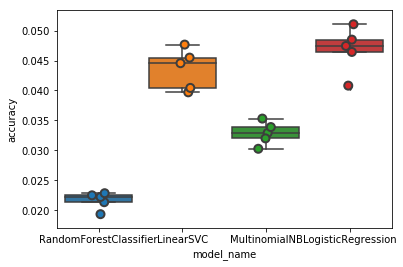

In [57]:

# Classification using 4 models
#   1)Random Forest 
#   2) Support Vector Machine
#   3)Naive Byes
#   4)Logistic Regression

# Cross Validation is used

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, lbSPDF.Player, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [59]:
# Accuracies after Classification using cross validation for all models
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.019356
1,RandomForestClassifier,1,0.021355
2,RandomForestClassifier,2,0.022505
3,RandomForestClassifier,3,0.022229
4,RandomForestClassifier,4,0.022854
5,LinearSVC,0,0.039692
6,LinearSVC,1,0.047659
7,LinearSVC,2,0.045485
8,LinearSVC,3,0.044553
9,LinearSVC,4,0.040430


In [60]:
# Average accuracy for each model
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.043564
LogisticRegression        0.046845
MultinomialNB             0.032881
RandomForestClassifier    0.021660
Name: accuracy, dtype: float64